In [27]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%autoreload

import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(0, '../')
from constants import *
from utilities_RF import *
from utilities import *

In [29]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'direct_rad:W',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}
wanted_months = [3,4,5,6,7,8,9]

# Dataset A

In [30]:
selected_features_a = selected_features.copy()
selected_features_a.remove("direct_rad:W")
hyperparameters_a = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_a = wanted_months

In [31]:
X_train_a = prepare_X(X_observed_a.copy(), X_estimated_a.copy(), selected_features_a.copy(), wanted_months_a.copy())
X_train_a, y_train_a = resize_training_data(X_train_a.copy(), y_a.copy())
X_test_a = prepare_testdata_rf_a(X_test_a.copy(), selected_features_a.copy())

In [32]:
rf_a = Random_Forest(hyperparameters, X_train_a, X_test_a, y_train_a)

In [33]:
#rf_a_cross_val_predictions,rf_a_cross_val_actuals, rf_a_cross_val_mae_mean = rf_a.cross_val_stack(X_train_a, y_train_a)

In [34]:
rf_a.cross_validate(X_train_a, y_train_a)

Cross-validation scores: [304.2244499  299.76548607 303.00740137 299.45533989 132.51457471]
Mean cross-validation score: 267.7934503890109


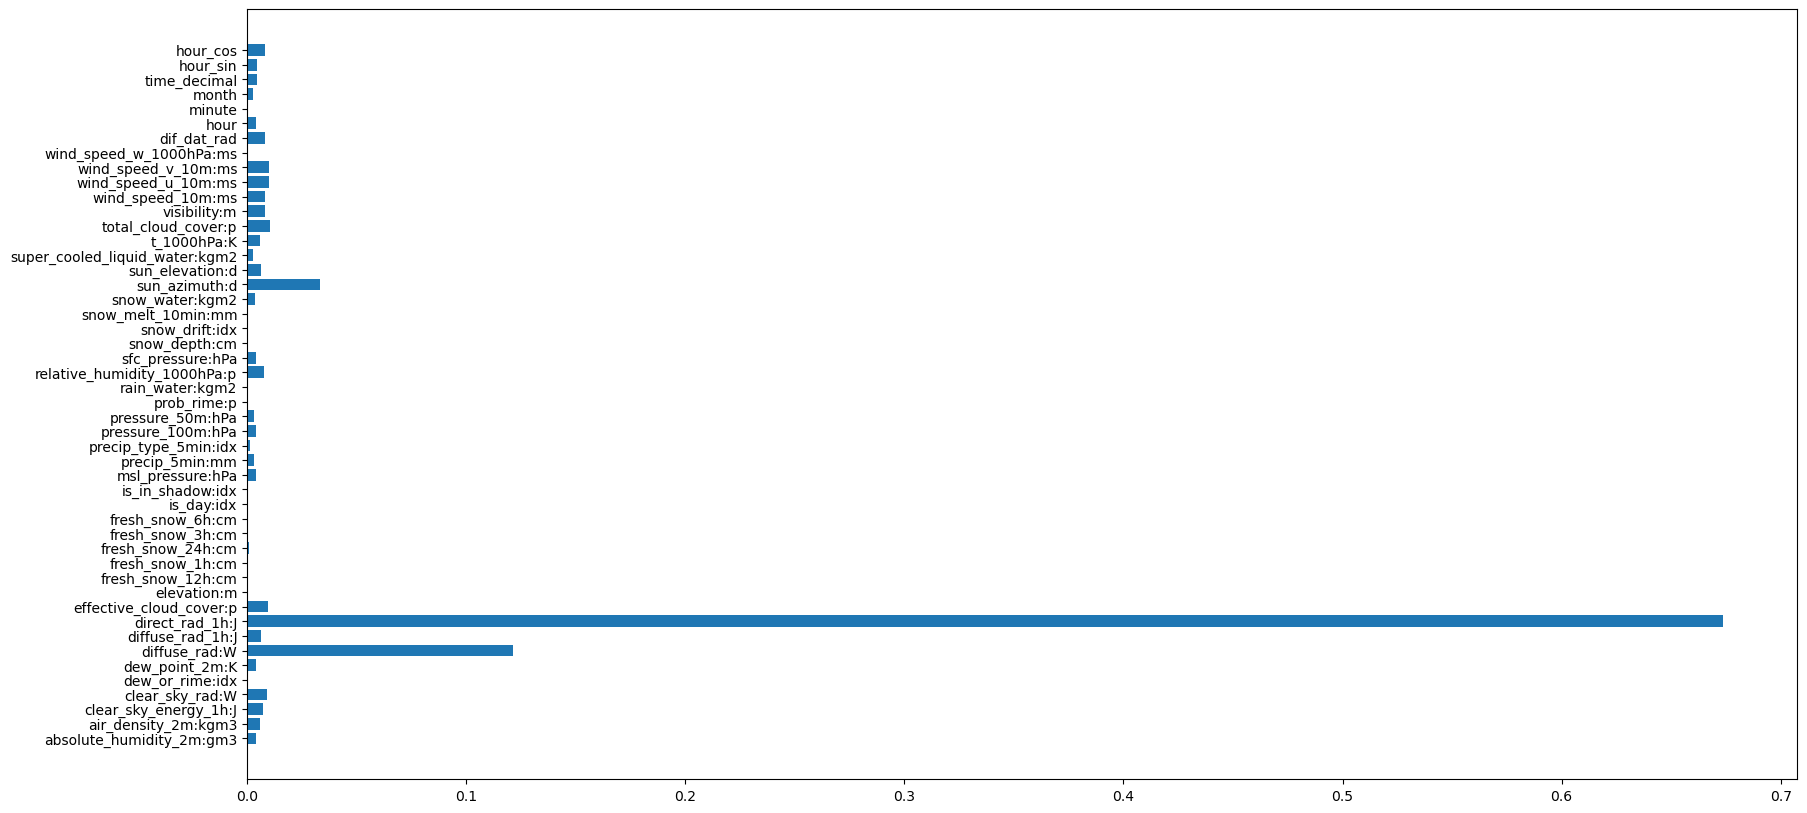

In [35]:
rf_a.fit()
rf_a.pred()
rf_a_test_pred = rf_a.prediction
rf_a.feature_importence_plot()

In [36]:
#rf_a.corr_plot()

# Dataset B

In [37]:
selected_features_b = selected_features.copy()
hyperparameters_b = {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_b = wanted_months

In [38]:
y_to_fit_b, y_to_predict_b = augment_y_b(y_b.copy())
y_augmented_b = predict_y_with_random_forest(y_to_fit_b.copy(),y_to_predict_b.copy(),X_observed_b.copy(), X_estimated_b.copy(), selected_features_b.copy(), wanted_months_b.copy(), hyperparameters_b.copy())

penis


In [39]:
X_train_b_before_prepare = prepare_X(X_observed_b.copy(), X_estimated_b.copy(), selected_features_b.copy(), wanted_months_b.copy())
X_train_b, y_train_b = resize_training_data(X_train_b_before_prepare.copy(), y_augmented_b.copy())
X_test_b = prepare_testdata_rf_a(X_test_b.copy(), selected_features_b.copy())
rf_b = Random_Forest(hyperparameters_b.copy(), X_train_b.copy(), X_test_b.copy(), y_train_b.copy())

In [40]:
#rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_a, y_train_a)

In [41]:
rf_b.cross_validate(X_train_b, y_train_b)

Cross-validation scores: [58.07958612 48.86612958 59.08781936 48.71872189 28.94450597]
Mean cross-validation score: 48.739352582484756


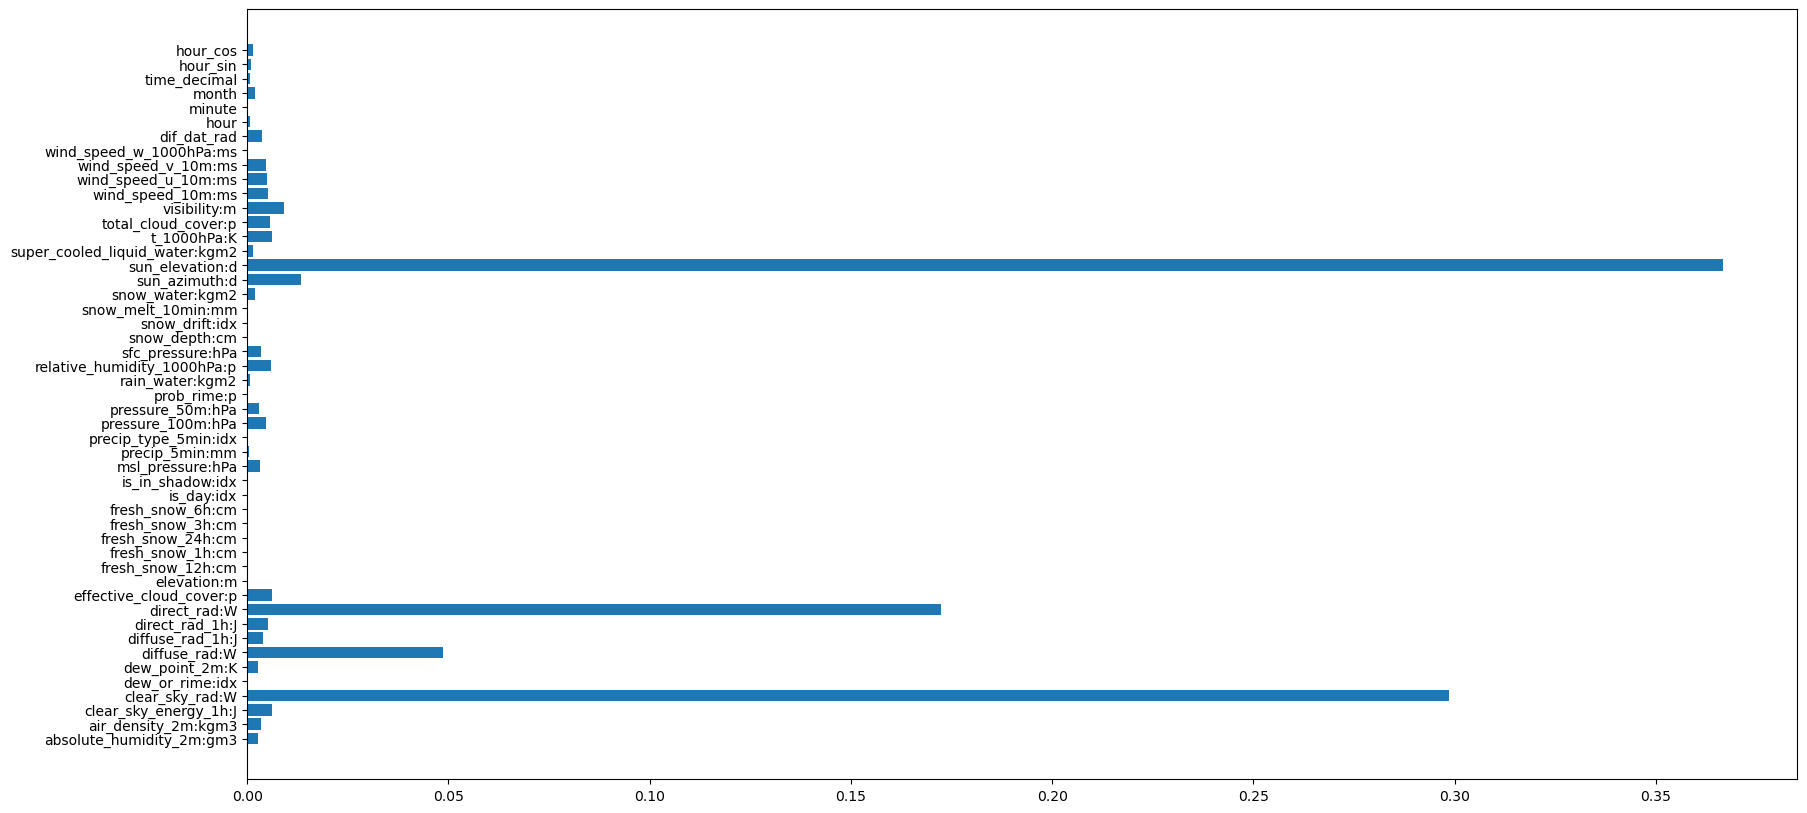

In [42]:
rf_b.fit()
rf_b.pred()
rf_b_test_pred = rf_b.prediction
rf_b.feature_importence_plot()

# Dataset C

In [43]:
selected_features_c = selected_features.copy()
hyperparameters_c = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
wanted_months_c = wanted_months

In [44]:
y_to_fit_c, y_to_predict_c = augment_y_c(y_c.copy())
y_augmented_c = predict_y_with_random_forest(y_to_fit_c.copy(),y_to_predict_c.copy(),X_observed_c.copy(), X_estimated_c.copy(), selected_features_c.copy(), wanted_months_c.copy(), hyperparameters_c.copy())

penis


In [45]:
X_train_c = prepare_X(X_observed_c.copy(), X_estimated_c.copy(), selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c.copy(), y_augmented_c)
X_test_c = prepare_testdata_rf_a(X_test_c.copy(), selected_features_c)

In [46]:
rf_c = Random_Forest(hyperparameters, X_train_c.copy(), X_test_c.copy(), y_train_c.copy())

In [47]:
#rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_a, y_train_a)

In [48]:
rf_c.cross_validate(X_train_c, y_train_c)

Cross-validation scores: [34.62988943 41.27984701 15.95906346 19.51288222 16.48587041]
Mean cross-validation score: 25.573510505303414


In [49]:
rf_c.fit()
rf_c.pred()
rf_c_test_pred = rf_c.prediction

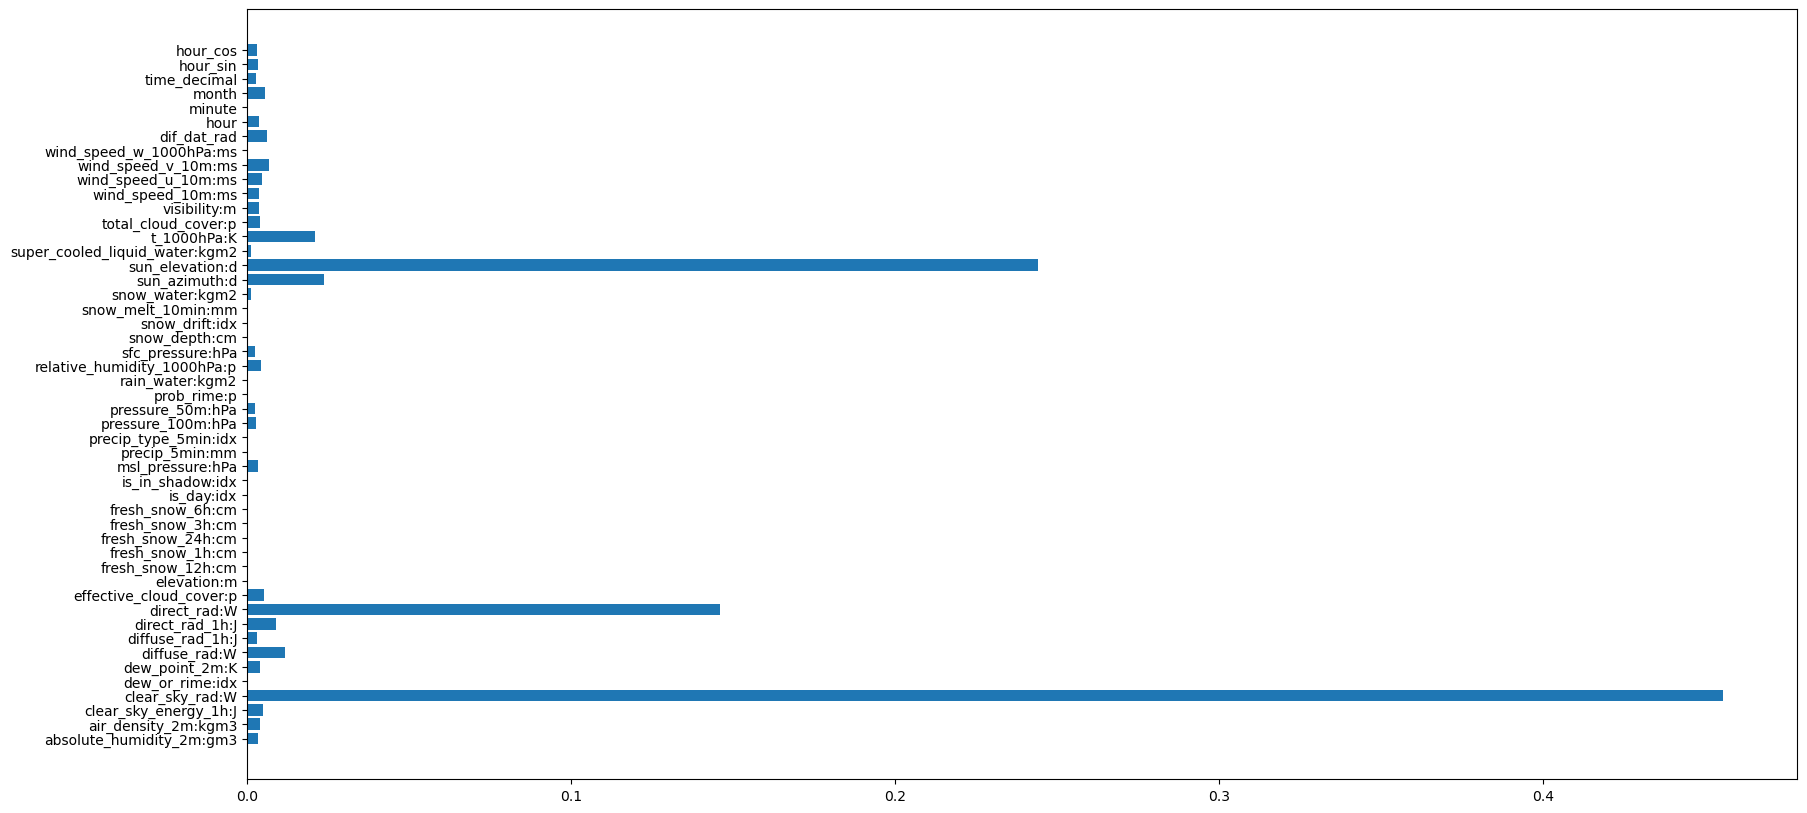

In [50]:
rf_c.feature_importence_plot()

In [51]:
y_pred_rf_test = np.concatenate((rf_a_test_pred, rf_b_test_pred, rf_c_test_pred), axis=0)
submission("trener_rf_på_augmented_y_v3.csv", y_pred_rf_test, "../../")